### IMPORTS

In [39]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
SAVE_PATH = "../saves/"

In [42]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [43]:
savefiles = [file for file in os.listdir(SAVE_PATH) if file != "pareto.csv"] 
savefiles

['saves_1710424156961.csv',
 'saves_1710424454746.csv',
 'saves_1710424515049.csv',
 'saves_1710424637019.csv',
 'saves_1710424916129.csv',
 'saves_1710429089587.csv',
 'saves_1710429514728.csv',
 'saves_1710429727788.csv',
 'saves_1710429865873.csv',
 'saves_1710429985239.csv',
 'saves_1710430130919.csv',
 'saves_1710430150347.csv',
 'saves_1710430307672.csv',
 'saves_1710430871920.csv',
 'saves_1710431208782.csv',
 'saves_1710433005888.csv',
 'saves_1710433038829.csv',
 'saves_1710433067539.csv',
 'saves_1710433104086.csv',
 'saves_1710433145786.csv',
 'saves_1710433231572.csv',
 'saves_1710433284422.csv',
 'saves_1710433317750.csv',
 'saves_1710433333342.csv',
 'saves_1710433396034.csv',
 'saves_1710433430620.csv',
 'saves_1710433540895.csv',
 'saves_1710433601737.csv',
 'saves_1710433642142.csv',
 'saves_1710433666142.csv',
 'saves_1710433698580.csv',
 'saves_1710433876094.csv',
 'saves_1710436421269.csv',
 'saves_1710436501194.csv',
 'saves_1710437276237.csv',
 'saves_171043733861

### VISUALIZATION

In [44]:
pareto = pd.read_csv(SAVE_PATH+'pareto.csv', sep=';')
pareto

,utilA,utilB,utilSum,contract,pareto
0,1989,8186,10175,"[34,122,25,48,10,176,83,129,8,84,67,61,74,108,...",True
1,2008,8168,10176,"[71,2,25,48,10,176,83,129,8,84,67,61,74,108,21...",True
2,1987,8192,10179,"[49,67,25,48,10,176,83,129,8,84,122,73,74,108,...",True
3,1939,8241,10180,"[45,76,25,48,10,176,83,129,8,84,67,61,74,108,2...",True
4,1948,8239,10187,"[69,76,25,48,10,176,83,129,8,84,67,61,74,108,2...",True
...,...,...,...,...,...
129,9486,6554,16040,"[73,174,23,136,149,189,11,57,3,130,163,122,12,...",True
130,9481,6561,16042,"[50,174,23,136,75,18,171,57,3,130,163,122,12,1...",True
131,9537,6553,16090,"[50,174,23,136,149,189,11,57,3,130,163,122,12,...",True
132,9841,6552,16393,"[50,174,23,136,75,18,171,57,3,130,163,122,12,1...",True


In [45]:
for savefile in savefiles:
    contracts = pd.read_csv(SAVE_PATH + savefile, sep=';')
    if "pareto" not in contracts.columns:
        contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
        contracts = contracts.sort_values(by="utilSum", ascending=False).drop_duplicates()
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
    pareto = pd.concat([pareto, contracts[contracts["pareto"]]])
pareto = pareto.sort_values(by="utilSum", ascending=False).drop_duplicates()
pareto["pareto"] = get_pareto(pareto[["utilA","utilB"]])
pareto = pareto[pareto["pareto"]].sort_values(by="utilSum", ascending=True)
pareto.to_csv(SAVE_PATH+'pareto.csv', sep=';', index=False)
pareto

,utilA,utilB,utilSum,contract,pareto
253,1989,8186,10175,"[34,122,25,48,10,176,83,129,8,84,67,61,74,108,...",True
347,2008,8168,10176,"[71,2,25,48,10,176,83,129,8,84,67,61,74,108,21...",True
2,1987,8192,10179,"[49,67,25,48,10,176,83,129,8,84,122,73,74,108,...",True
300,1939,8241,10180,"[45,76,25,48,10,176,83,129,8,84,67,61,74,108,2...",True
310,1948,8239,10187,"[69,76,25,48,10,176,83,129,8,84,67,61,74,108,2...",True
...,...,...,...,...,...
251,9486,6554,16040,"[73,174,23,136,149,189,11,57,3,130,163,122,12,...",True
89,9481,6561,16042,"[50,174,23,136,75,18,171,57,3,130,163,122,12,1...",True
275,9537,6553,16090,"[50,174,23,136,149,189,11,57,3,130,163,122,12,...",True
132,9841,6552,16393,"[50,174,23,136,75,18,171,57,3,130,163,122,12,1...",True


(1087.2, 10344.8, 6416.05, 9340.95)

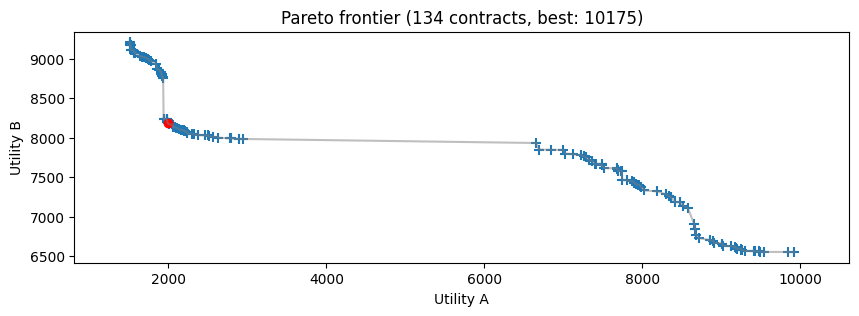

In [46]:
pareto = pareto.sort_values(by="utilA", ascending=True)
best_util = pareto.sort_values(by="utilSum").iloc[0]
plt.figure(figsize=(10,3))
plt.title(f"Pareto frontier ({len(pareto)} contracts, best: {best_util['utilSum']})")
plt.plot(pareto["utilA"], pareto["utilB"], color='gray', linestyle='-', alpha=0.5)
plt.scatter(pareto["utilA"], pareto["utilB"], s=50, marker="+")
plt.scatter(best_util["utilA"], best_util["utilB"], marker="o", color="red")
plt.xlabel("Utility A")
plt.ylabel("Utility B")
plt.axis("equal")

In [47]:
pareto.shape

(134, 5)